In [1]:
import numpy as np
import MDAnalysis as md
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from bvvmmm import multi_bvvmmm

In [2]:
coord = md.Universe("diala_vacuum.parm7","adp_vac_md.dcd")
print("Number of frames:", coord.trajectory.n_frames)
# select protein
protein = coord.select_atoms("protein")
# Calculate phi and psi angles for each residue
# selection of atomgroups
phi_sel = [coord.residues[1].phi_selection()]
psi_sel = [coord.residues[1].psi_selection()]

from MDAnalysis.analysis.dihedrals import Dihedral
phi = Dihedral(phi_sel).run()
psi = Dihedral(psi_sel).run()

# format data for MultiSineBVVMMM
phi_psi = np.column_stack((phi.results.angles,psi.results.angles)).reshape(-1,1,2)

/Users/mmccull/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Number of frames: 285715


In [3]:
print(phi_psi.shape)
phi_psi = np.radians(phi_psi)

(285715, 1, 2)


In [10]:
components = np.arange(1,8,1)
ll, aic, bic, icl, cv_ll = multi_bvvmmm.component_scan(phi_psi, components, n_attempts=12, train_frac=0.9)

Training on 257143 samples and validating on 28572 samples.
Components: 1, Attempt: 1, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 2, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 3, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 4, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 5, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 6, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 7, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 8, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 9, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 10, Training LL: -1.6660399975641076, CV LL: -1.667283053527696
Components: 1, Attempt: 11, Training LL: -1.6660399975641076, CV LL: 

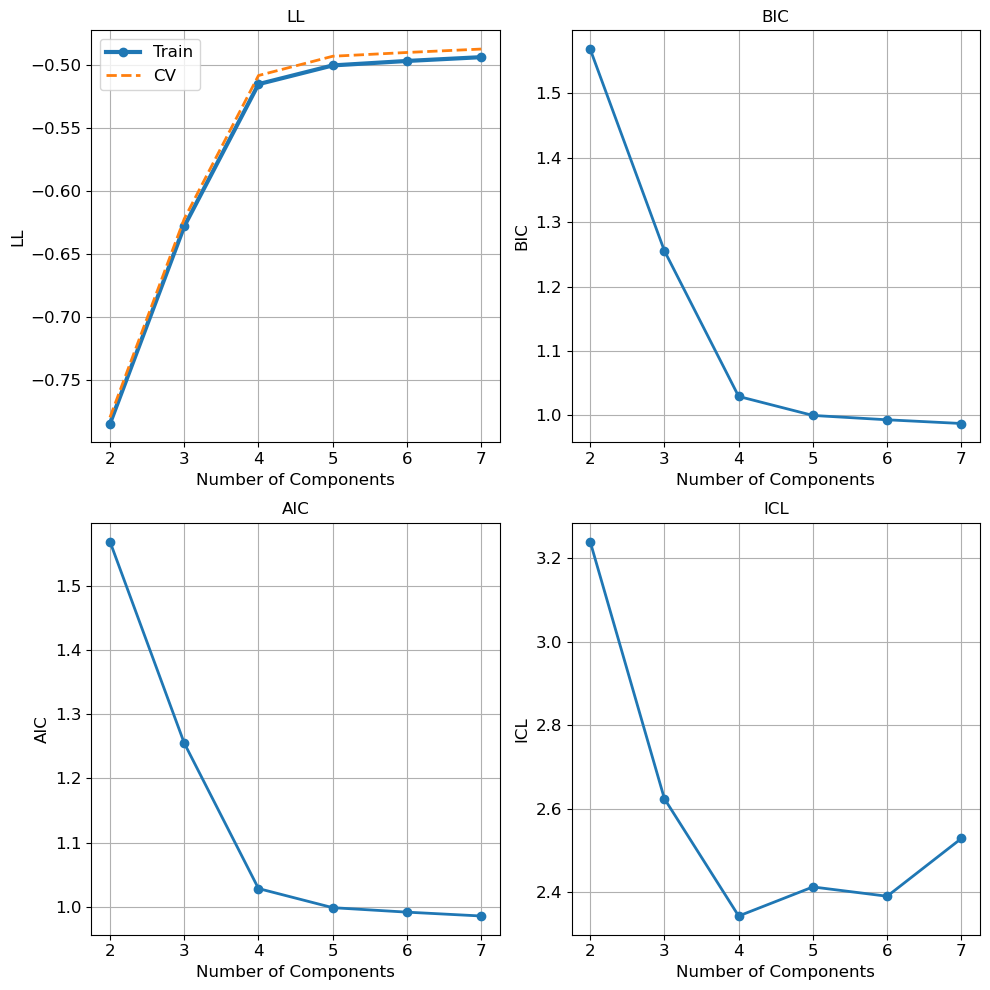

In [11]:
# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # 2 row, 2 columns
fontsize=12
# LL
axes[0,0].plot(components[1:], ll[1:], '-o', lw=3, label="Train")
axes[0,0].plot(components[1:], cv_ll[1:], '--', lw=2, label="CV")
axes[0,0].set_title('LL', fontsize=fontsize)
axes[0,0].set_xlabel('Number of Components',fontsize=fontsize)
axes[0,0].set_ylabel('LL',fontsize=fontsize)
axes[0,0].grid(True)
axes[0,0].tick_params(axis='both', labelsize=fontsize)
axes[0,0].legend(fontsize=fontsize)

# BIC
axes[0,1].plot(components[1:], bic[1:], '-o', lw=2)
axes[0,1].set_title('BIC',fontsize=fontsize)
axes[0,1].set_xlabel('Number of Components',fontsize=fontsize)
axes[0,1].set_ylabel('BIC',fontsize=fontsize)
axes[0,1].grid(True)
axes[0,1].tick_params(axis='both', labelsize=fontsize)

# AIC
axes[1,0].plot(components[1:], aic[1:], '-o', lw=2)
axes[1,0].set_title('AIC',fontsize=fontsize)
axes[1,0].set_xlabel('Number of Components',fontsize=fontsize)
axes[1,0].set_ylabel('AIC',fontsize=fontsize)
axes[1,0].grid(True)
axes[1,0].tick_params(axis='both', labelsize=fontsize)

# ICL
axes[1,1].plot(components[1:], icl[1:], '-o', lw=2)
axes[1,1].set_title('ICL',fontsize=fontsize)
axes[1,1].set_xlabel('Number of Components',fontsize=fontsize)
axes[1,1].set_ylabel('ICL',fontsize=fontsize)
axes[1,1].grid(True)
axes[1,1].tick_params(axis='both', labelsize=fontsize)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show();

1 -0.5589112012851886
2 -0.5593189234427789
3 -0.5593288824812497
4 -0.5569612704246505
5 -0.5140862666438896
6 -0.5593280742309404
7 -0.5593348565281545
8 -0.5561209170790165
9 -0.5994057706359321
10 -0.5992913471043929
11 -0.5993087114333453
12 -0.5993105985838239
13 -0.5588030795372313
14 -0.5993031805522321
15 -0.5507303978988886


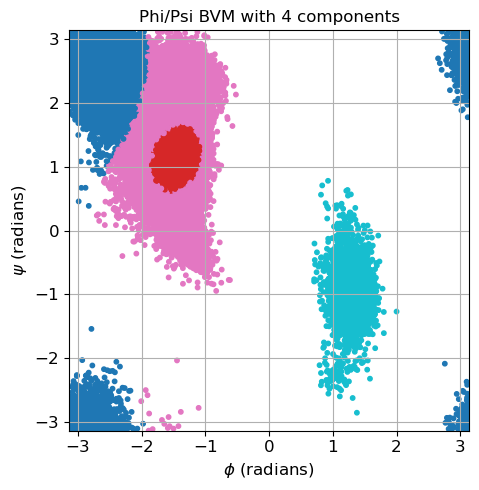

In [6]:
adp_4components = multi_bvvmmm.fit_with_attempts(phi_psi, 4, 15)
adp_4components.plot_clusters(phi_psi)

1 -0.5056792044392316
2 -0.505606275854429
3 -0.5056603603709776
4 -0.5603314137702831
5 -0.5000190370793658
6 -0.5057317489019152
7 -0.5993093972370128
8 -0.5005394082931784
9 -0.5068065978384413
10 -0.50617086962437
11 -0.5060315098588283
12 -0.5056323058620723
13 -0.5057137485023666
14 -0.5056459714434431
15 -0.5515743705249698


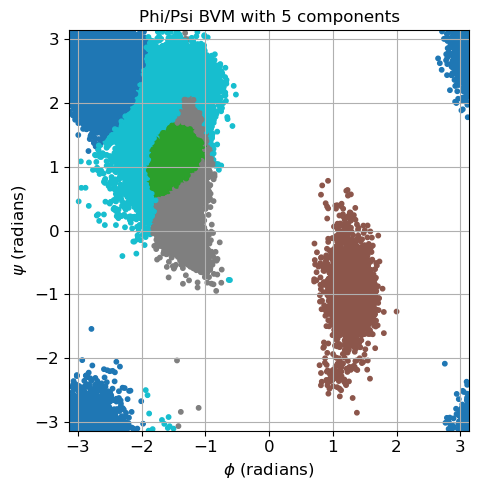

In [8]:
adp_5components = multi_bvvmmm.fit_with_attempts(phi_psi, 5, 15)
adp_5components.plot_clusters(phi_psi)

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_42673/3034772314.py:9: RuntimeWarning: divide by zero encountered in log
  ref_fe = -np.log(hist)


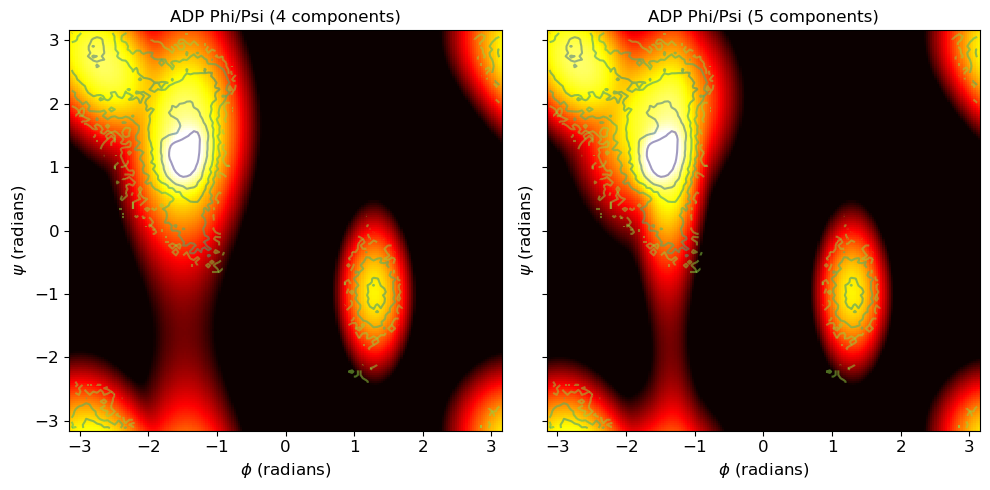

In [9]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5),sharey=True) # 2 rows, 1 column
fontsize=12
# ADP phi_psi  ref (FE)
hist, xedges, yedges = np.histogram2d(phi_psi[:,0,0], phi_psi[:,0,1], bins=120, density=True)
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
Y, X = np.meshgrid(x,y)
ref_fe = -np.log(hist)
ref_fe -= np.amin(ref_fe)

# set some grid stuff
theta = np.linspace(-np.pi, np.pi, 200)
phi_mesh, psi_mesh = np.meshgrid(theta,theta)
phi_psi_mesh = np.column_stack((phi_mesh.flatten(),psi_mesh.flatten())).reshape(-1,1,2)
# 4 component mixture for Phi/Psi 
fe = (-adp_4components.ln_pdf(phi_psi_mesh)).reshape(phi_mesh.shape)
axes[0].pcolormesh(phi_mesh, psi_mesh, fe, cmap='hot_r', vmin=0, vmax=10.5)
axes[0].contour(X, Y, ref_fe,alpha=0.5)
#axes[0].grid(True)
axes[0].set_xlabel(r'$\phi$ (radians)', fontsize=fontsize)
axes[0].set_ylabel(r'$\psi$ (radians)', fontsize=fontsize)
axes[0].set_title("ADP Phi/Psi (4 components)", fontsize=fontsize)
axes[0].tick_params(labelsize=fontsize)
# 5 component mixture for Phi/Psi 
fe = (-adp_5components.ln_pdf(phi_psi_mesh)).reshape(phi_mesh.shape)
axes[1].pcolormesh(phi_mesh, psi_mesh, fe, cmap='hot_r', vmin=0, vmax=10.5)
axes[1].contour(X, Y, ref_fe,alpha=0.5)
#axes[0].grid(True)
axes[1].set_xlabel(r'$\phi$ (radians)', fontsize=fontsize)
axes[1].set_ylabel(r'$\psi$ (radians)', fontsize=fontsize)
axes[1].set_title("ADP Phi/Psi (5 components)", fontsize=fontsize)
axes[1].tick_params(labelsize=fontsize)

# Add color bar
#fig.colorbar(pm, label="Free Energy/kT")
plt.tight_layout()
# Show the plot
plt.show();